code for benin-malanville


In [37]:

import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Read the CSV file
df = pd.read_csv('benin-malanville.csv')

In [30]:
#First We need to look the dimensions of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (525600, 19)


In [28]:
#Display the first few rows of the dataset to check Basic things
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [34]:

# Check for null values in each column 
columns_with_null = df.columns[df.isnull().any()]

# Drop columns with null values
df = df.drop(columns_with_null, axis=1)

# Display the updated dataset
print("Updated Dataset:")
print(df)

Updated Dataset:
               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        WSstdev     WD

In [33]:
# Check for duplicate rows
df.duplicated().sum()

# Drop duplicate rows
df = df.drop_duplicates()

In [35]:
# Select the columns of interest
columns_of_interest = ['GHI', 'DNI', 'DHI']
# Calculate z-scores for the selected columns
z_scores = stats.zscore(df[columns_of_interest])
# Remove rows with z-score less than 3
filtered_df = df[(z_scores >= 3).all(axis=1)]
# Display the filtered dataset
print("Filtered Dataset:")
print(filtered_df)

Filtered Dataset:
Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB]
Index: []


In [41]:

# Calculate descriptive statistics for each numeric column
numeric_columns = df.select_dtypes(include='number')

statistics = pd.DataFrame(columns=['Column', 'Mean', 'Mode', 'Median', 'Std Deviation', 'Range', 'Variance', '1st Quartile', '2nd Quartile', '3rd Quartile'])
for column in numeric_columns:
    column_stats = {
        'Column': column,
        'Mean': df[column].mean(),
        'Mode': df[column].mode().values[0],
        'Median': df[column].median(),
        'Std Deviation': df[column].std(),
        'Range': df[column].max() - df[column].min(),
        'Variance': df[column].var(),
        '1st Quartile': df[column].quantile(0.25),
        '2nd Quartile': df[column].quantile(0.50),
        '3rd Quartile': df[column].quantile(0.75)
    }
    statistics = pd.concat([statistics, pd.DataFrame([column_stats])], ignore_index=True)

# Display the statistics
print(statistics)



C:\Users\huawei\AppData\Local\Temp\ipykernel_1880\662035645.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  statistics = pd.concat([statistics, pd.DataFrame([column_stats])], ignore_index=True)


           Column        Mean   Mode  Median  Std Deviation   Range  \
0             GHI  240.559452   -1.5     1.8     331.131327  1425.9   
1             DNI  167.187516   -0.3    -0.1     261.710501   960.1   
2             DHI  115.358961   -1.4     1.6     158.691074   771.8   
3            ModA  236.589496    0.0     4.5     326.894859  1342.3   
4            ModB  228.883576    0.0     4.3     316.536515  1342.3   
5            Tamb   28.179683   24.9    28.0       5.924297    32.8   
6              RH   54.487969  100.0    55.1      28.073069    97.9   
7              WS    2.121113    0.0     1.9       1.603466    19.5   
8          WSgust    2.809195    0.0     2.6       2.029120    26.6   
9         WSstdev    0.473390    0.4     0.5       0.273395     4.2   
10             WD  153.435172    0.0   181.0     102.332842   360.0   
11        WDstdev    8.582407    0.0     8.6       6.385864    99.4   
12             BP  994.197199  995.0   994.0       2.474993    18.0   
13    

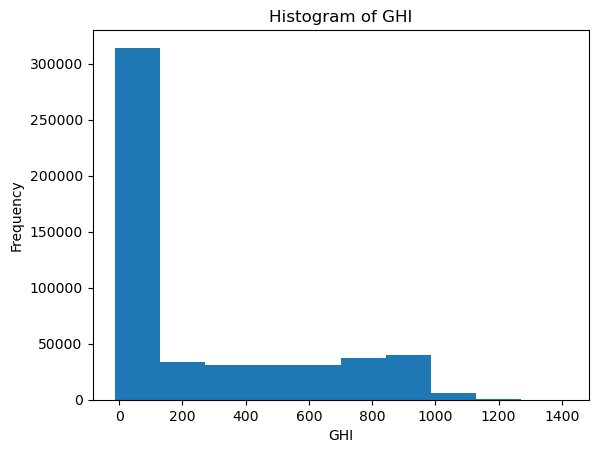

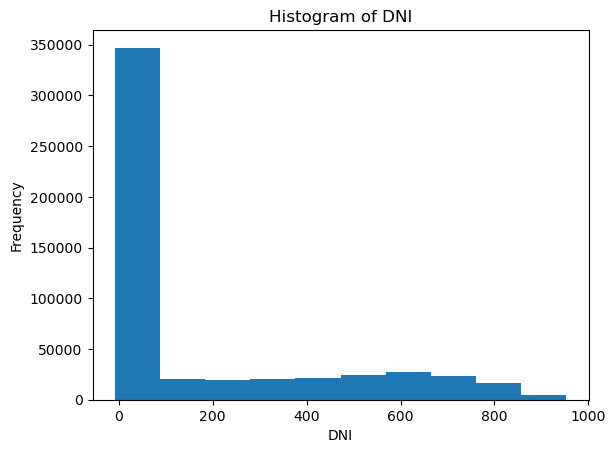

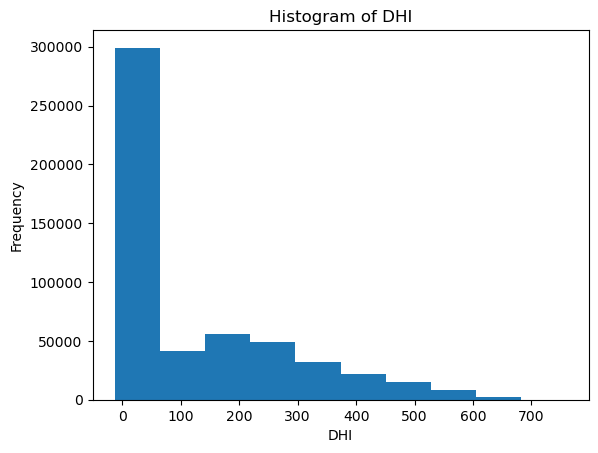

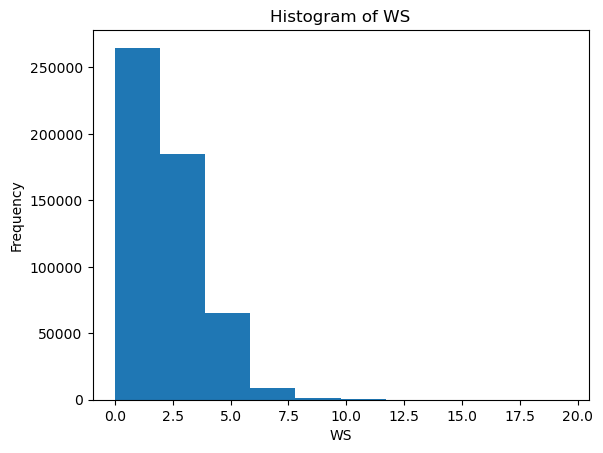

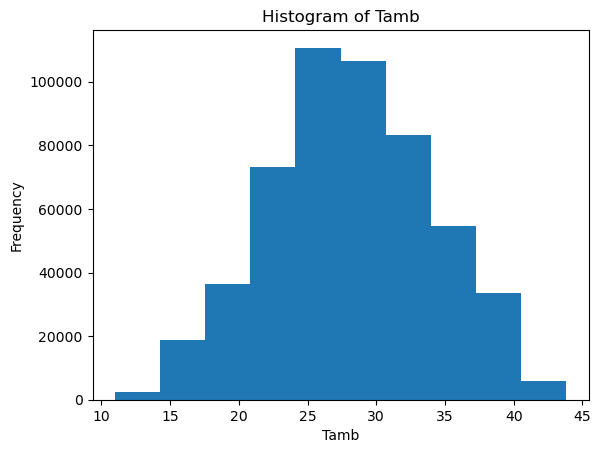

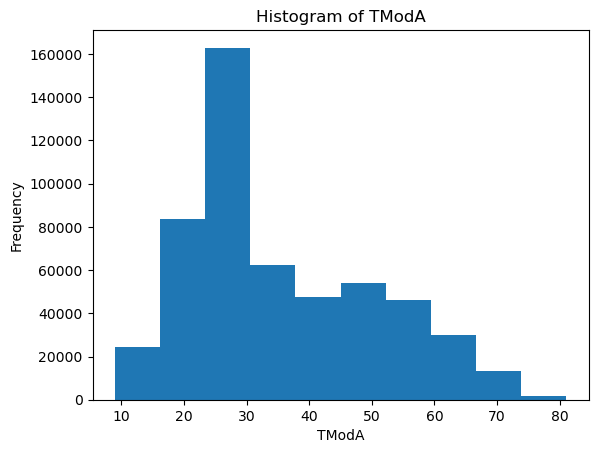

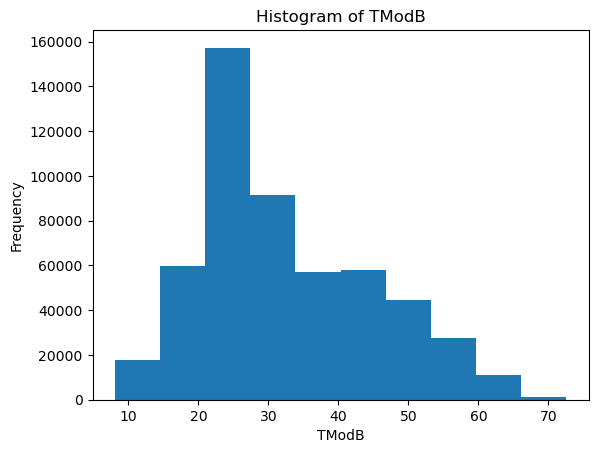

In [43]:

# Select specific columns for histogram
columns = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']

# Create histograms for each selected column
for column in columns:
    plt.hist(df[column], bins=10)  # Adjust the number of bins as needed
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

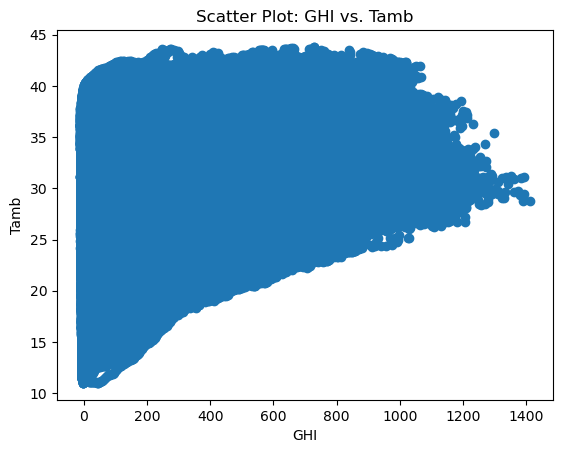

In [9]:
# Generate a scatter plot for GHI vs. Tamb
plt.scatter(df['GHI'], df['Tamb'])

# Add labels and title
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('Scatter Plot: GHI vs. Tamb')

# Display the scatter plot
plt.show()

In [10]:
# Select the columns of interest
columns_of_interest = ['GHI', 'DHI', 'DNI', 'TModA', 'TModB']

# Calculate the correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
            GHI       DHI       DNI     TModA     TModB
GHI    1.000000  0.849989  0.882376  0.920127  0.874338
DHI    0.849989  1.000000  0.546602  0.825012  0.777829
DNI    0.882376  0.546602  1.000000  0.790340  0.756007
TModA  0.920127  0.825012  0.790340  1.000000  0.983443
TModB  0.874338  0.777829  0.756007  0.983443  1.000000


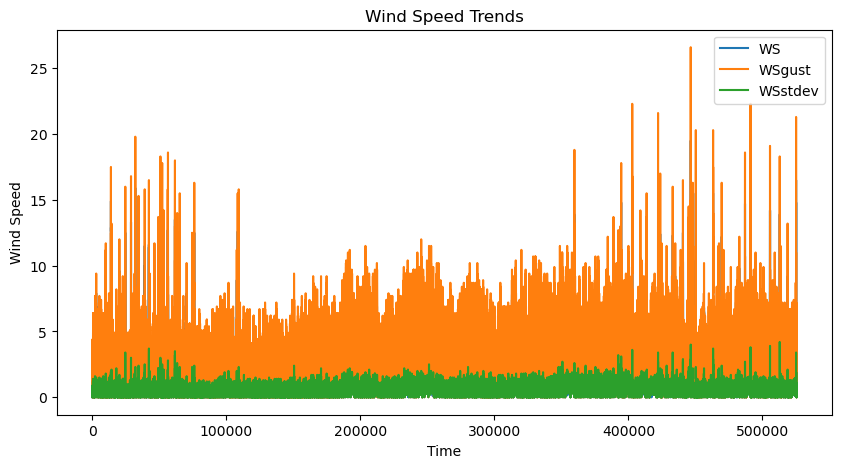

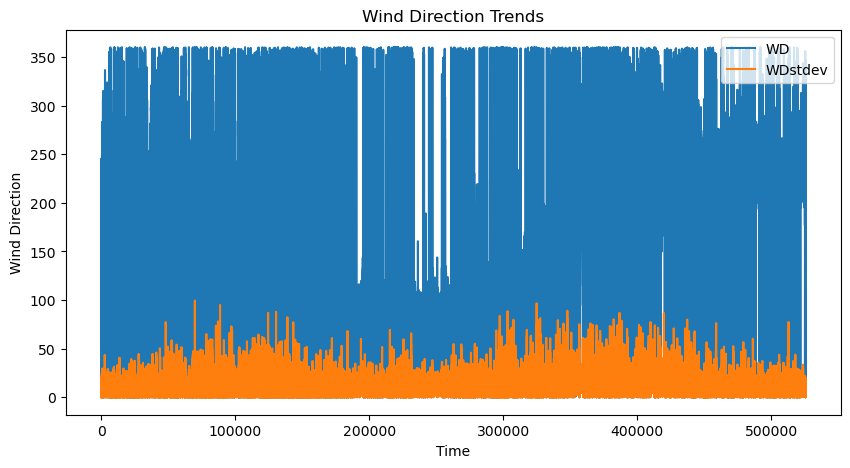

In [11]:
# Extract the columns of interest
wind_speed_columns = ['WS', 'WSgust', 'WSstdev']
wind_direction_columns = ['WD', 'WDstdev']

# Plot wind speed trends
plt.figure(figsize=(10, 5))
for column in wind_speed_columns:
    plt.plot(df[column], label=column)
plt.xlabel('Time')
plt.ylabel('Wind Speed')
plt.title('Wind Speed Trends')
plt.legend()
plt.show()

# Plot wind direction trends
plt.figure(figsize=(10, 5))
for column in wind_direction_columns:
    plt.plot(df[column], label=column)
plt.xlabel('Time')
plt.ylabel('Wind Direction')
plt.title('Wind Direction Trends')
plt.legend()
plt.show()

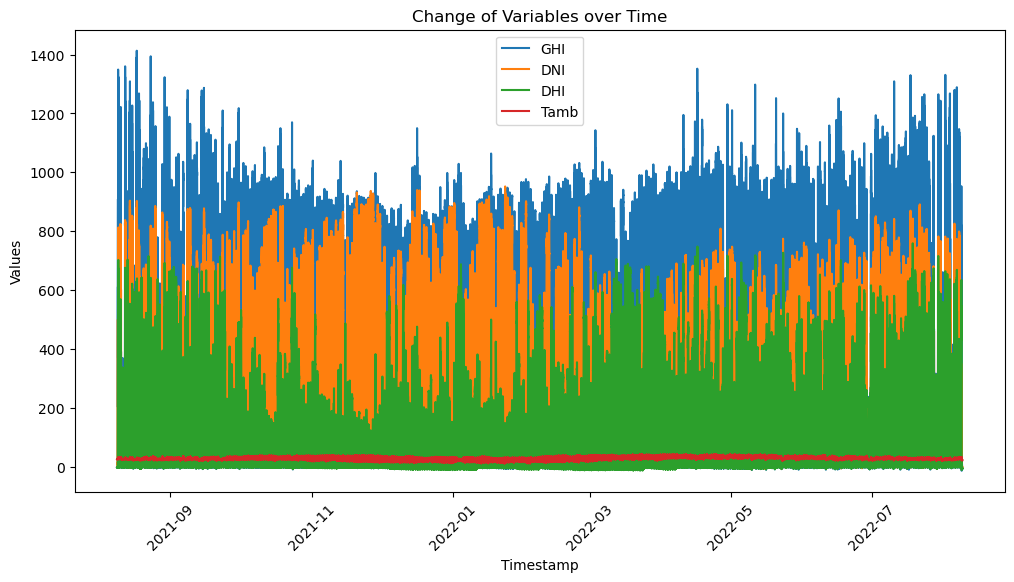

In [12]:
# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plot GHI, DNI, DHI, and Tamb over time
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Change of Variables over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()


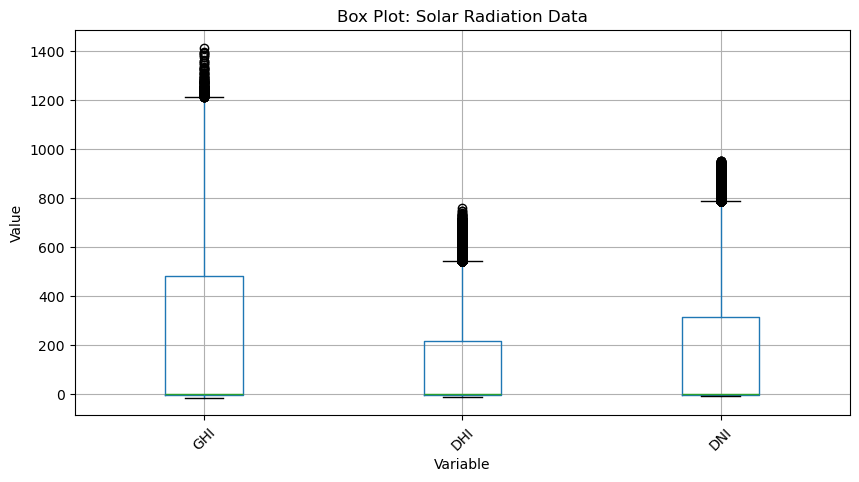

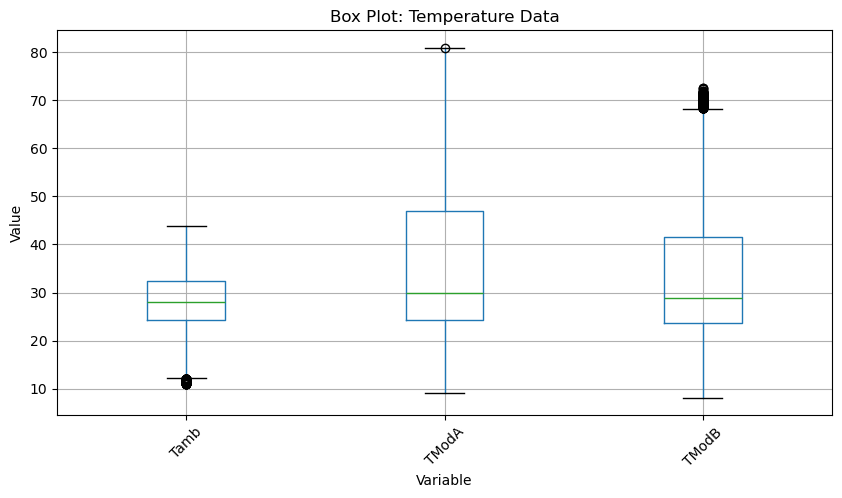

In [13]:
# Select the columns of interest
solar_radiation_columns = ['GHI', 'DHI', 'DNI']
temperature_columns = ['Tamb', 'TModA', 'TModB']

# Create box plots for solar radiation data
plt.figure(figsize=(10, 5))
df[solar_radiation_columns].boxplot()
plt.title('Box Plot: Solar Radiation Data')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

# Create box plots for temperature data
plt.figure(figsize=(10, 5))
df[temperature_columns].boxplot()
plt.title('Box Plot: Temperature Data')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()